In [1]:
import numpy as np
import pandas as pd
import re
import itertools

import imageio
import imagesc

import glob
import re

import matplotlib.pyplot as plt
import seaborn as sns

import skimage
from skimage import measure
from skimage.transform import resize
import skimage.io
from skimage.io import imsave
from skimage.measure import label, regionprops_table, regionprops

import cv2 as cv
from typing import List
import tifffile as tiff

In [2]:
data_path = '/Users/haokai/Desktop/Github repository/Processed data/'

In [3]:
file_path = '/Users/haokai/Desktop/Github repository/Analysis/Fig. 3/'

# WNT-BC1

In [4]:
time_course_1 = pd.read_csv(file_path + 'WNT-BC1_time_course_conditions.csv')
time_course_1 

,cell_line,TMP (uM),Dox (ng/ml ),CHIR (uM),stimulation time (Days)
0,0,0,0,0,0
1,1,10,500,2,1
2,2,10,500,2,2
3,3,10,500,2,3
4,4,10,500,2,4
5,5,10,500,2,5
6,6,10,500,2,6
7,7,10,500,2,7
8,8,10,500,3,1
9,9,10,500,3,2


In [3]:
Wnt_1_df = pd.read_csv(data_path + 'WNT-BC1_time_dependent_recording.csv')
Wnt_1_df

,cell_line,position,cell_label,Dox (ng/ml ),CHIR (uM),CFP_intensity,lnCFP,stimulation time (Days),int_ratio mean,int_ratio std,int_ratio CV,mout avg mean,mout avg std,mout avg CV,barcode_number sum
0,0,1,1,0,0,344.159364,5.841105,0,0.795783,0.025142,2.997325,0.233820,0.150123,60.909708,10
1,0,1,2,0,0,370.923407,5.915996,0,0.793839,0.019722,2.342301,0.178789,0.148998,78.571211,9
2,0,1,3,0,0,389.080894,5.963787,0,0.807104,0.025565,3.043245,0.272347,0.164373,57.986439,13
3,0,1,4,0,0,341.011466,5.831916,0,0.812263,0.024004,2.559273,0.268652,0.206209,66.473501,4
4,0,1,5,0,0,351.927198,5.863424,0,0.826202,0.017266,1.934769,0.367322,0.140972,35.531316,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13037,19,9,41,500,5,9397.308910,9.148179,5,1.379409,NaN,0.000000,11.992213,NaN,0.000000,1
13038,19,9,42,500,5,15968.915200,9.678399,5,1.357724,0.045494,3.178775,11.974681,0.025006,0.198105,10
13039,19,9,44,500,5,8446.207329,9.041473,5,1.376452,NaN,0.000000,11.988091,NaN,0.000000,1
13040,19,9,45,500,5,10563.112699,9.265123,5,1.382427,0.044940,3.140543,11.916237,0.209035,1.694722,15


In [6]:
cell_counts_1 = Wnt_1_df.groupby('cell_line', as_index=False).size()
cell_counts_1

,cell_line,size
0,0,269
1,1,253
2,2,744
3,3,700
4,4,1184
5,5,889
6,6,1054
7,7,700
8,8,331
9,9,626


# BMP-BC1

In [7]:
time_course_2 = pd.read_csv(file_path + 'BMP-BC1_time_course_conditions.csv')
time_course_2 

,cell_line,TMP (uM),Dox (ng/ml ),BMP2 (ng/ml ),stimulation time (Days)
0,0,0,0,0,0
1,1,10,500,64,1
2,2,10,500,64,2
3,3,10,500,64,3
4,4,10,500,64,4
5,5,10,500,64,5
6,6,10,500,64,6
7,7,10,500,64,7
8,8,10,500,256,1
9,9,10,500,256,2


In [4]:
BMP_1_df = pd.read_csv(data_path + 'BMP-BC1_time_dependent_recording.csv')
BMP_1_df

,cell_line,position,cell_label,Dox (ng/ml ),BMP2 (ng/ml ),CFP_intensity,lnCFP,stimulation time (Days),int_ratio mean,int_ratio std,int_ratio CV,mout avg mean,mout avg std,mout avg CV,barcode_number sum
0,0,1,1,0,0,852.438428,6.748101,0,0.815445,0.026263,2.277410,0.302703,0.166430,38.877605,2
1,0,1,2,0,0,347.807182,5.851648,0,0.770332,0.031552,3.547174,0.129331,0.076843,51.455794,4
2,0,1,3,0,0,340.059143,5.829120,0,0.788897,0.005170,0.586164,0.138507,0.058199,37.582754,5
3,0,1,4,0,0,344.746066,5.842808,0,0.768601,0.021290,2.477492,0.121953,0.039401,28.897427,5
4,0,1,5,0,0,344.628679,5.842468,0,0.769032,0.015762,1.833233,0.076524,0.035496,41.488918,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15770,21,9,184,500,1024,16073.163976,9.684906,7,1.345423,0.027538,1.830686,11.979282,0.021857,0.163195,5
15771,21,9,186,500,1024,8439.510891,9.040680,7,1.311777,NaN,0.000000,11.993064,NaN,0.000000,1
15772,21,9,188,500,1024,7013.132628,8.855540,7,1.348058,NaN,0.000000,11.986350,NaN,0.000000,1
15773,21,9,190,500,1024,8942.233372,9.098541,7,1.370960,NaN,0.000000,11.987885,NaN,0.000000,1


In [9]:
cell_counts_2 = BMP_1_df.groupby('cell_line', as_index=False).size()
cell_counts_2

,cell_line,size
0,0,611
1,1,234
2,2,455
3,3,525
4,4,556
5,5,805
6,6,805
7,7,792
8,8,284
9,9,531


# BMP-BC2

In [10]:
time_course_3 = pd.read_csv(file_path + 'BMP-BC2_time_course_conditions.csv')
time_course_3 

,cell_line,TMP (uM),Dox (ng/ml ),BMP2 (ng/ml ),stimulation time (Days)
0,0,0,0,0,0
1,1,10,500,4,1
2,2,10,500,4,2
3,3,10,500,4,3
4,4,10,500,4,4
5,5,10,500,4,5
6,6,10,500,4,6
7,8,10,500,16,1
8,9,10,500,16,2
9,10,10,500,16,3


In [5]:
BMP_2_df = pd.read_csv(data_path + 'BMP-BC2_time_dependent_recording.csv')
BMP_2_df

,cell_line,position,cell_label,Dox (ng/ml ),BMP2 (ng/ml ),CFP_intensity,lnCFP,stimulation time (Days),int_ratio mean,int_ratio std,int_ratio CV,mout avg mean,mout avg std,mout avg CV,barcode_number sum
0,0,1,1,0,0,1029.287616,6.936622,0,0.821532,0.026259,2.959259,0.423434,0.153812,33.630399,7
1,0,1,2,0,0,1012.021037,6.919705,0,0.836303,NaN,0.000000,0.434207,NaN,0.000000,1
2,0,1,3,0,0,1020.247099,6.927800,0,0.831121,0.016988,1.927136,0.370249,0.137100,34.911494,9
3,0,1,4,0,0,937.729924,6.843462,0,0.784274,NaN,0.000000,0.242499,NaN,0.000000,1
4,0,1,5,0,0,1007.265973,6.914995,0,0.780613,0.026835,3.138210,0.185754,0.097695,48.011322,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12515,20,9,136,500,64,9347.737302,9.142890,6,1.339127,0.027640,1.459473,11.982905,0.013573,0.080094,2
12516,20,9,138,500,64,9082.080491,9.114059,6,1.364078,NaN,0.000000,11.992201,NaN,0.000000,1
12517,20,9,140,500,64,6607.374751,8.795942,6,1.275386,0.070879,5.145197,11.208830,1.317364,10.881082,7
12518,20,9,143,500,64,9699.326237,9.179812,6,1.411053,NaN,0.000000,11.983401,NaN,0.000000,1


In [12]:
cell_counts_3 = BMP_2_df.groupby('cell_line', as_index=False).size()
cell_counts_3

,cell_line,size
0,0,498
1,1,309
2,2,350
3,3,342
4,4,719
5,5,1296
6,6,734
7,8,385
8,9,413
9,10,456


In [6]:
# Set the font properties
plt.rcParams.update({
    'font.family': 'Arial',     # Set the font family
    'font.size': 12,            # Set the base font size
    'axes.titlesize': 16,       # Set the font size of the axes title
    'axes.labelsize': 16,       # Set the font size of the x and y labels
    'xtick.labelsize': 12,      # Set the font size of the x tick labels
    'ytick.labelsize': 12,      # Set the font size of the y tick labels
    'legend.fontsize': 12,      # Set the font size of the legend
    'figure.titlesize': 16      # Set the font size of the figure title
})

# Fig 5C

/var/folders/gn/s03fpkm91rs2n_qpydhyntfh0000gn/T/ipykernel_22558/4025149729.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=time_df,


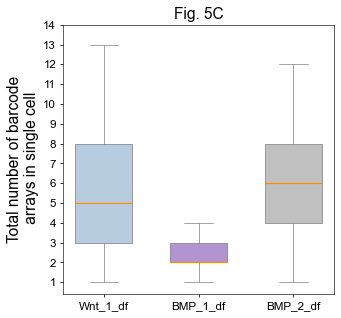

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

temp_df_1 = Wnt_1_df[Wnt_1_df['CHIR (uM)'].isin([0,3])].copy()
temp_df_2 = BMP_1_df[BMP_1_df['BMP2 (ng/ml )'].isin([0,256])].copy()
temp_df_3 = BMP_2_df[BMP_2_df['BMP2 (ng/ml )'].isin([0,16])].copy()

color_palette = sns.color_palette(['#99CCFF','#B266FF', '#C0C0C0'])  
# Add a new column to each DataFrame to identify the source
temp_df_1['source'] = 'Wnt_1_df'
temp_df_2['source'] = 'BMP_1_df'
temp_df_3['source'] = 'BMP_2_df'

# Combine the DataFrames
time_df = pd.concat([temp_df_1, temp_df_2, temp_df_3])

# Create the boxplot
plt.figure(figsize=(5, 5), dpi=70)
sns.boxplot(data=time_df, 
            x='source', 
            y='barcode_number sum', 
            #inner = 'box',
            palette=color_palette,
            linewidth=0.625,
            saturation=0.4,
            #density_norm = 'count',
            whis=1,
            showfliers=False,
            medianprops={'color': 'darkorange', 'linewidth': 1.25, 'linestyle': '-'},
            width=0.6)

# Add titles and labels
plt.title('Fig. 5C')
plt.xlabel('')
plt.ylabel('Total number of barcode\n arrays in single cell')
plt.gca().margins(x=0.05)
plt.yticks(np.arange(1, 15, 1))
#sns.despine()
plt.grid(False)
plt.gca().spines['bottom'].set_linewidth(0.625)
plt.gca().spines['left'].set_linewidth(0.625)
plt.gca().spines['right'].set_linewidth(0.625)
plt.gca().spines['top'].set_linewidth(0.625)
#save_path = os.path.join(data_dir_1, f'barcode_numbers_of_monoclonal_cells_from_time_dependent_recording.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()